This work is done using Jupiter Notebook

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
#loading the datasets
loan_tr = pd.read_csv("train.csv")
loan_ts = pd.read_csv("test.csv")

In [3]:
loan_tr.head()

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
0               45                1441      01-01-84        Salaried   
1               45                1502      31-07-85   Self employed   
2               45                1497      24-08-85   Self employed   
3               45                1501      30-12-93   Self employed   
4               45                1495      09-12-77   Self employed   

       ...      SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  \
0      ...                          0                     0   
1      ...                          0                     0   
2      ...                          0                     0   
3      ...                          0                     0   
4      ...                          0                     0   

   PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   
2                                    0         0yrs 0mon   
3                                    0         0yrs 8mon   
4                                    0         0yrs 0mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  loan_default  
0              0yrs 0mon                0             0  
1             1yrs 11mon                0             1  
2              0yrs 0mon                0             0  
3              1yrs 3mon                1             1  
4              0yrs 0mon                1             1  

[5 rows x 41 columns]

In [4]:
loan_tr.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [5]:
#Printing the types of the features
loan_tr.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

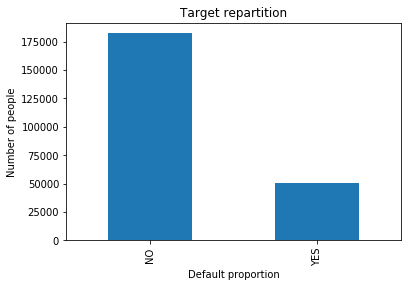

In [6]:
fig= plt.figure()
ax= plt.axes()
the_target = loan_tr['loan_default']
the_target.replace(to_replace=[1,0], value= ['YES','NO'], inplace = True)
plt.title('Target repartition')
ax = ax.set(xlabel='Default proportion', ylabel='Number of people')
the_target.value_counts().plot.bar()
plt.show()

#Here we see the distribution of the target.

In [7]:
corr_mat = loan_tr.corr()
corr_mat

UniqueID  disbursed_amount  asset_cost  \
UniqueID                             1.000000          0.145575    0.144671   
disbursed_amount                     0.145575          1.000000    0.752668   
asset_cost                           0.144671          0.752668    1.000000   
ltv                                 -0.030537          0.376747   -0.301188   
branch_id                           -0.004509          0.018328    0.018586   
supplier_id                          0.025747          0.078596    0.150002   
manufacturer_id                     -0.021514          0.095203   -0.005256   
Current_pincode_ID                   0.030500          0.068540    0.275878   
State_ID                            -0.057734         -0.023956   -0.026348   
Employee_code_ID                     0.075983          0.010120    0.008711   
MobileNo_Avl_Flag                         NaN               NaN         NaN   
Aadhar_flag                         -0.001372         -0.015589   -0.093716   
PAN_flag                            -0.014291          0.014490    0.048075   
VoterID_flag                         0.008201          0.011665    0.083899   
Driving_flag                        -0.026072          0.001381    0.020484   
Passport_flag                       -0.001382          0.008291    0.005542   
PERFORM_CNS.SCORE                   -0.014016          0.011409   -0.047398   
PRI.NO.OF.ACCTS                     -0.013584          0.034461   -0.026798   
PRI.ACTIVE.ACCTS                    -0.020862          0.039542   -0.021692   
PRI.OVERDUE.ACCTS                   -0.007915          0.019422   -0.014782   
PRI.CURRENT.BALANCE                 -0.007259          0.015713   -0.004356   
PRI.SANCTIONED.AMOUNT               -0.002910          0.006294   -0.001180   
PRI.DISBURSED.AMOUNT                -0.002563          0.006412   -0.001221   
SEC.NO.OF.ACCTS                     -0.044180         -0.014916   -0.022600   
SEC.ACTIVE.ACCTS                    -0.039888         -0.014275   -0.020359   
SEC.OVERDUE.ACCTS                   -0.027486         -0.007305   -0.013455   
SEC.CURRENT.BALANCE                 -0.013428         -0.004227   -0.008697   
SEC.SANCTIONED.AMOUNT               -0.017114         -0.005271   -0.010776   
SEC.DISBURSED.AMOUNT                -0.016857         -0.005119   -0.010594   
PRIMARY.INSTAL.AMT                  -0.009321          0.002350   -0.004356   
SEC.INSTAL.AMT                      -0.013518         -0.005525   -0.005738   
NEW.ACCTS.IN.LAST.SIX.MONTHS        -0.003842          0.035880   -0.021968   
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS -0.009186          0.020198   -0.007932   
NO.OF_INQUIRIES                      0.016537          0.038513   -0.017301   

                                          ltv  branch_id  supplier_id  \
UniqueID                            -0.030537  -0.004509     0.025747   
disbursed_amount                     0.376747   0.018328     0.078596   
asset_cost                          -0.301188   0.018586     0.150002   
ltv                                  1.000000   0.006382    -0.103732   
branch_id                            0.006382   1.000000     0.225744   
supplier_id                         -0.103732   0.225744     1.000000   
manufacturer_id                      0.121003  -0.049957    -0.063916   
Current_pincode_ID                  -0.300112   0.048192     0.187401   
State_ID                             0.004882   0.187782     0.105502   
Employee_code_ID                     0.004940   0.088764     0.095792   
MobileNo_Avl_Flag                         NaN        NaN          NaN   
Aadhar_flag                          0.106953  -0.036384    -0.081161   
PAN_flag                            -0.037786   0.030206     0.036804   
VoterID_flag                        -0.098393   0.021387     0.079355   
Driving_flag                        -0.024060  -0.015503    -0.015682   
Passport_flag                        0.004467  -0.008537    -0.008773   
PERFORM_CNS.SCORE             

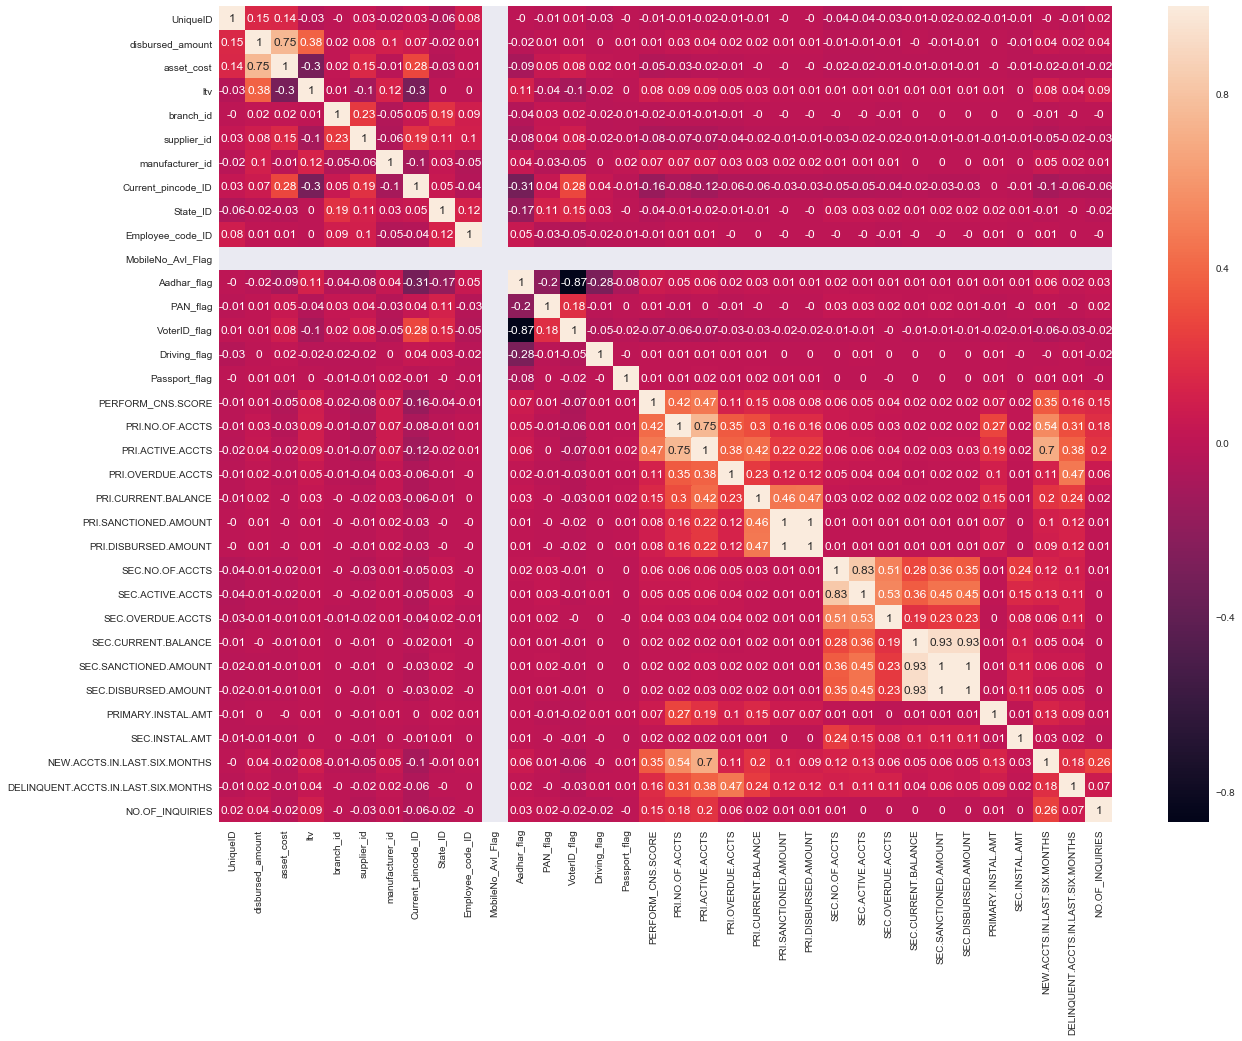

In [8]:
corr_mat1 = loan_tr.corr().round(2)

sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(data= corr_mat1,annot= True)


In [9]:
#we can see the heatmap having correlation coefficients among the variables.

In [10]:

#Delete to high or to low values
def delete_absurd_values(df_transformed,cols,max_value,percentage):
        
        
        for col in cols:
            if (df_transformed[col].dtypes !='object'):
                       
                q99=df_transformed[col].quantile(q=percentage)
                q01=df_transformed[col].quantile(q=(1-percentage))
                for i in df_transformed.index:
                    
                    if (df_transformed.loc[i,col]> max_value*q99 or df_transformed.loc[i,col]< q01/max_value):
                        df_transformed=df_transformed.drop(i)
        
        return df_transformed

cols=['disbursed_amount', 'asset_cost', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS','PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT','PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS','SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES']
df=delete_absurd_values(loan_tr,cols,5,0.999)

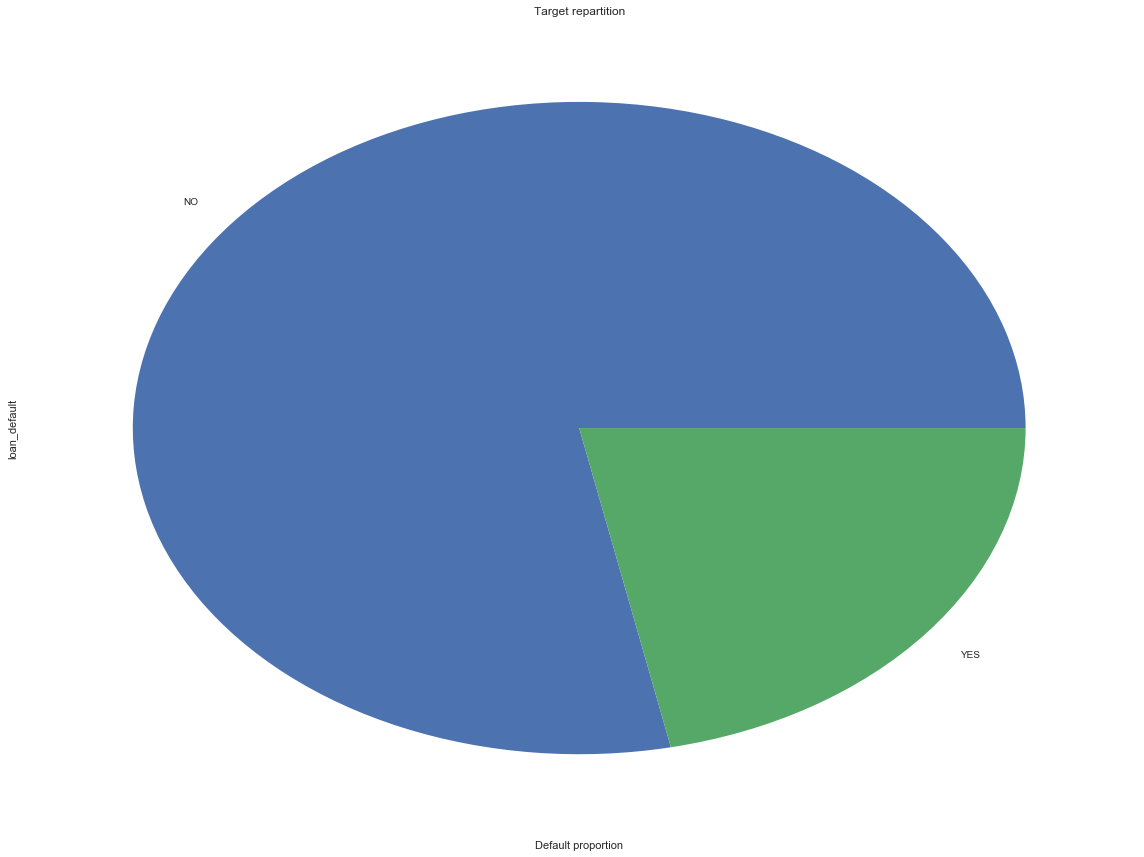

In [11]:
#The repartition of the target
fig7=plt.figure()
ax7=plt.axes()
the_target = loan_tr['loan_default']
the_target.replace(to_replace=[1,0], value= ['YES','NO'], inplace = True)
plt.title('Target repartition')
ax7 = ax7.set(xlabel='Default proportion')
the_target.value_counts().plot.pie()
plt.show()

In [12]:
#Printing the types of the features
loan_tr.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [13]:
#the percentage of missing value for each column
def nan_count_df(df_to_print):
    
    nan_count = df_to_print.isnull().sum()

    nan_percentage = (nan_count / len(df))*100

    nan_df=pd.concat([nan_percentage], axis=1)
    nan_df=nan_df.rename(columns={0:'Percentage'})
    nan_df=nan_df[nan_df.Percentage != 0]
    nan_df = nan_df.sort_values(by='Percentage',ascending=False)
    return nan_df

nan_count_df(loan_tr)

Percentage
Employment.Type     3.29266

In [ ]:
#here is only one column with missing values: "Employment Type"

In [14]:
#Number of unique values
loan_tr.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

In [15]:
#Feature Engineering
loan_tr=loan_tr.rename(columns={'Date.of.Birth': 'Date_of_Birth','Employment.Type': 'Employment_Type', 'PERFORM_CNS.SCORE.DESCRIPTION': 'PERFORM_CNS_SCORE_DESCRIPTION'})

loan_tr.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [16]:
#converting 'Date_of_Birth' into the age 
now = pd.Timestamp('now')
loan_tr['Date_of_Birth'] = pd.to_datetime(loan_tr['Date_of_Birth'], format='%d-%m-%y')
loan_tr['Date_of_Birth'] = loan_tr['Date_of_Birth'].where(loan_tr['Date_of_Birth'] < now, loan_tr['Date_of_Birth'] -  np.timedelta64(100, 'Y'))
loan_tr['Age'] = (now - loan_tr['Date_of_Birth']).astype('<m8[Y]')
loan_tr=loan_tr.drop('Date_of_Birth',axis=1)

In [17]:
#One-Hot encoding

In [18]:

#Creating a function for encoding 2 categories features
def two_cat_encoding(df_to_transf):
    le = LabelEncoder()

    for cols in df_to_transf:
        if df_to_transf[cols].dtype == 'object':
            if len(list(df_to_transf[cols].unique())) == 2:
                le.fit(df_to_transf[cols])
                df_to_transf[cols] = le.transform(df_to_transf[cols])
    return df_to_transf
loan_tr=two_cat_encoding(loan_tr)

In [19]:
#There are two many different value type possible for a missing value so we will merge them
#into one column to reduce the dimension of the problem when applying oneHotEncoding (dummies)

In [20]:
loan_tr['PERFORM_CNS_SCORE_DESCRIPTION'].replace(to_replace=['Not Scored: More than 50 active Accounts found', 'Not Scored: No Activity seen on the customer (Inactive)','Not Scored: No Updates available in last 36 months','Not Enough Info available on the customer','Not Scored: Only a Guarantor','Not Scored: Sufficient History Not Available','Not Scored: Not Enough Info available on the customer'], value= 'Not Scored', inplace = True)

In [21]:
#dropping the features that does not seem to improve our model
columns_to_drop = ['UniqueID','MobileNo_Avl_Flag','DisbursalDate',
                   'AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH','SEC.OVERDUE.ACCTS']
loan_tr=loan_tr.drop(columns_to_drop, axis=1)

In [22]:
loan_tr.head()

disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0             50578       58400  89.55         67        22807   
1             47145       65550  73.23         67        22807   
2             53278       61360  89.63         67        22807   
3             57513       66113  88.48         67        22807   
4             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID Employment_Type  State_ID  \
0               45                1441        Salaried         6   
1               45                1502   Self employed         6   
2               45                1497   Self employed         6   
3               45                1501   Self employed         6   
4               45                1495   Self employed         6   

   Employee_code_ID  ...   SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  \
0              1998  ...                     0                      0   
1              1998  ...                     0                      0   
2              1998  ...                     0                      0   
3              1998  ...                     0                      0   
4              1998  ...                     0                      0   

   SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  \
0                     0                   0               0   
1                     0                1991               0   
2                     0                   0               0   
3                     0                  31               0   
4                     0                   0               0   

   NEW.ACCTS.IN.LAST.SIX.MONTHS DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  \
0                             0                                   0   
1                             0                                   1   
2                             0                                   0   
3                             0                                   0   
4                             0                                   0   

   NO.OF_INQUIRIES  loan_default   Age  
0                0             0  35.0  
1                0             1  34.0  
2                0             0  34.0  
3                1             1  25.0  
4                1             1  41.0  

[5 rows x 35 columns]

In [23]:
#apply the One-HotEncoding method to the features that hasn't been encodeed yet
loan_tr = pd.get_dummies(loan_tr)
loan_tr.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'loan_default', 'Age', 'Employment_Type_Salaried',
       'Employment_Type_Self employed',
       'PERFORM_CNS_SCORE_DESCRIPTION_A-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_B-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_C-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_D-Very Low Risk',
   

In [24]:
loan_tr.shape

(233154, 50)

In [25]:
loan_tr.dtypes.value_counts()

int64      31
uint8      17
float64     2
dtype: int64

In [26]:
X =loan_tr.drop('loan_default',axis=1)
y = loan_tr['loan_default']  

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [27]:
#using Logistic Regression as it is a classification problem
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(C=1.0, class_weight=None,fit_intercept=True,max_iter=100)
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
#getting accuracy score

In [31]:
Pred = logisticRegr.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print (accuracy_score(y_test, Pred))

0.783135802822


In [35]:
#getting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Pred)

array([[54778,     1],
       [15168,     0]], dtype=int64)

In [39]:
#working on test dataset

In [37]:
nan_count_df(loan_ts)

Percentage
Employment.Type    1.479785

In [38]:
loan_ts.nunique()

UniqueID                               112392
disbursed_amount                        14525
asset_cost                              29383
ltv                                      5902
branch_id                                  82
supplier_id                              2863
manufacturer_id                            11
Current_pincode_ID                       6202
Date.of.Birth                           14052
Employment.Type                             2
DisbursalDate                              27
State_ID                                   22
Employee_code_ID                         3143
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         566
PERFORM_CNS.SCORE.DESCRIPTION              19
PRI.NO.OF.ACCTS                   

In [44]:
loan_ts=loan_ts.rename(columns={'Date.of.Birth': 'Date_of_Birth','Employment.Type': 'Employment_Type', 'PERFORM_CNS.SCORE.DESCRIPTION': 'PERFORM_CNS_SCORE_DESCRIPTION'})

loan_ts.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')

In [46]:
#converting 'Date_of_Birth' into the age 
now = pd.Timestamp('now')
loan_ts['Date_of_Birth'] = pd.to_datetime(loan_ts['Date_of_Birth'], format='%d-%m-%y')
loan_ts['Date_of_Birth'] = loan_ts['Date_of_Birth'].where(loan_ts['Date_of_Birth'] < now, loan_ts['Date_of_Birth'] -  np.timedelta64(100, 'Y'))
loan_ts['Age'] = (now - loan_ts['Date_of_Birth']).astype('<m8[Y]')
loan_ts=loan_ts.drop('Date_of_Birth',axis=1)

In [47]:
loan_ts=two_cat_encoding(loan_ts)

In [48]:
loan_ts['PERFORM_CNS_SCORE_DESCRIPTION'].replace(to_replace=['Not Scored: More than 50 active Accounts found', 'Not Scored: No Activity seen on the customer (Inactive)','Not Scored: No Updates available in last 36 months','Not Enough Info available on the customer','Not Scored: Only a Guarantor','Not Scored: Sufficient History Not Available','Not Scored: Not Enough Info available on the customer'], value= 'Not Scored', inplace = True)

In [49]:
#dropping the columns
loan_ts=loan_ts.drop(columns_to_drop, axis=1)

In [50]:
loan_ts.head()

disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0             53478       63558  86.54         67        22807   
1             55513       63163  89.45         67        22807   
2             65282       84320  79.93         78        23135   
3             46905       63896  76.58         78        17014   
4             51428       63896  86.08         78        17014   

   manufacturer_id  Current_pincode_ID Employment_Type  State_ID  \
0               45                1497        Salaried         6   
1               45                1497   Self employed         6   
2               86                2071        Salaried         4   
3               45                2070   Self employed         4   
4               45                2069        Salaried         4   

   Employee_code_ID  ...   SEC.ACTIVE.ACCTS  SEC.CURRENT.BALANCE  \
0              1998  ...                  0                    0   
1              1998  ...                  0                    0   
2              1646  ...                  0                    0   
3              1646  ...                  0                    0   
4              1646  ...                  0                    0   

   SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT  \
0                      0                     0                   0   
1                      0                     0                5605   
2                      0                     0                   0   
3                      0                     0                   0   
4                      0                     0                   0   

   SEC.INSTAL.AMT NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0               0                            0   
1               0                            1   
2               0                            0   
3               0                            0   
4               0                            0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  NO.OF_INQUIRIES   Age  
0                                    0                0  45.0  
1                                    0                1  34.0  
2                                    0                0  23.0  
3                                    0                0  46.0  
4                                    0                0  47.0  

[5 rows x 34 columns]

In [51]:
#apply the One-HotEncoding method to the features that hasn't been encodeed yet
loan_ts = pd.get_dummies(loan_ts)
loan_ts.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'Age', 'Employment_Type_Salaried',
       'Employment_Type_Self employed',
       'PERFORM_CNS_SCORE_DESCRIPTION_A-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_B-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_C-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_D-Very Low Risk',
       'PERFORM_CNS

In [52]:
loan_ts.shape

(112392, 49)

In [55]:
loan_ts.dtypes.value_counts()

int64      30
uint8      17
float64     2
dtype: int64

In [73]:
#predicting the outputs of the test set
Pred1 = logisticRegr.predict(loan_ts)

In [74]:
Pred1.shape

(112392,)

In [76]:
[Pred1]

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64)]

In [77]:
loan_ts['predicted']=Pred1

In [78]:
loan_ts.head()

disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0             53478       63558  86.54         67        22807   
1             55513       63163  89.45         67        22807   
2             65282       84320  79.93         78        23135   
3             46905       63896  76.58         78        17014   
4             51428       63896  86.08         78        17014   

   manufacturer_id  Current_pincode_ID  State_ID  Employee_code_ID  \
0               45                1497         6              1998   
1               45                1497         6              1998   
2               86                2071         4              1646   
3               45                2070         4              1646   
4               45                2069         4              1646   

   Aadhar_flag    ...      PERFORM_CNS_SCORE_DESCRIPTION_G-Low Risk  \
0            1    ...                                             0   
1            1    ...                                             0   
2            1    ...                                             0   
3            1    ...                                             0   
4            1    ...                                             0   

   PERFORM_CNS_SCORE_DESCRIPTION_H-Medium Risk  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   PERFORM_CNS_SCORE_DESCRIPTION_I-Medium Risk  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   PERFORM_CNS_SCORE_DESCRIPTION_J-High Risk  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   PERFORM_CNS_SCORE_DESCRIPTION_K-High Risk  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   PERFORM_CNS_SCORE_DESCRIPTION_L-Very High Risk  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   PERFORM_CNS_SCORE_DESCRIPTION_No Bureau History Available  \
0                                                  1           
1                                                  0           
2                                                  1           
3                                                  0           
4                                                  1           

   PERFORM_CNS_SCORE_DESCRIPTION_Not Scored  predicted  
0                                         0          0  
1                                         0          0  
2                                         0          0  
3                                         1          0  
4                                         0          0  

[5 rows x 50 columns]

In [79]:
loan_ts.to_csv('test_pred.csv')